# A quck 10 Minutes introduction to Pandas

Credit: this is a notebook cribbed from [the official "10 Minutes to Pandas"](http://pandas.pydata.org/pandas-docs/stable/10min.html).

## Pandas: tools for data analysis in Python

* emphasis on tabular data (csv and the like)
* database/spreadsheet-like functionality
* rich support for mixed data (numpy is for homogeneous arrays)
* integrates cleanly with numpy and matplotlib

<center>
<a href="http://pandas.pydata.org" target="_blank"> 
<img src="files/pandas-book.jpg"></a>
</center>

There is also a wonderful [set of free tutorials](https://bitbucket.org/hrojas/learn-pandas) on Pandas.

In [1]:
import pandas as pd

# Let's also load the plotting/numerical tools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# make figures a bit larger by default
plt.rcParams['figure.figsize'] = (10,6)

## A quick taste of Pandas

Consider a standard stocks file you downloaded from [Yahoo Finance](http://finance.yahoo.com/q/hp?s=AAPL+Historical+Prices) (note that Pandas actually [ships with a utility to get that data for you](http://pandas.pydata.org/pandas-docs/stable/remote_data.html#remote-data-yahoo)):

In [3]:
!head AAPL.csv

Date,Open,High,Low,Close,Volume,Adj Close
2013-08-23,503.27,503.35,499.35,501.02,7877000,501.02
2013-08-22,504.98,505.59,498.20,502.96,8721700,502.96
2013-08-21,503.59,507.15,501.20,502.36,11995700,502.36
2013-08-20,509.71,510.57,500.82,501.07,12810300,501.07
2013-08-19,504.34,513.74,504.00,507.74,18232800,507.74
2013-08-16,500.15,502.94,498.86,502.33,12939500,502.33
2013-08-15,496.42,502.40,489.08,497.91,17510500,497.91
2013-08-14,497.88,504.25,493.40,498.50,27013300,498.50
2013-08-13,470.94,494.66,468.05,489.57,31497900,489.57


In [4]:
stock = pd.read_csv('AAPL.csv')
stock.head()

Date    Open    High     Low   Close    Volume  Adj Close
0  2013-08-23  503.27  503.35  499.35  501.02   7877000     501.02
1  2013-08-22  504.98  505.59  498.20  502.96   8721700     502.96
2  2013-08-21  503.59  507.15  501.20  502.36  11995700     502.36
3  2013-08-20  509.71  510.57  500.82  501.07  12810300     501.07
4  2013-08-19  504.34  513.74  504.00  507.74  18232800     507.74

In [5]:
stock.index = stock.pop('Date')
stock.head()

Open    High     Low   Close    Volume  Adj Close
Date                                                           
2013-08-23  503.27  503.35  499.35  501.02   7877000     501.02
2013-08-22  504.98  505.59  498.20  502.96   8721700     502.96
2013-08-21  503.59  507.15  501.20  502.36  11995700     502.36
2013-08-20  509.71  510.57  500.82  501.07  12810300     501.07
2013-08-19  504.34  513.74  504.00  507.74  18232800     507.74

In [6]:
stock.sort(inplace=True)
stock.head()

Open   High    Low  Close    Volume  Adj Close
Date                                                       
1996-01-02  32.25  32.25  31.75  32.13   4983200       7.81
1996-01-03  32.00  32.88  31.87  32.13  15368800       7.81
1996-01-04  32.38  32.38  31.37  31.56  10721200       7.67
1996-01-05  31.62  34.25  31.37  34.25  15929200       8.33
1996-01-08  34.50  35.50  34.00  34.63   4341200       8.42

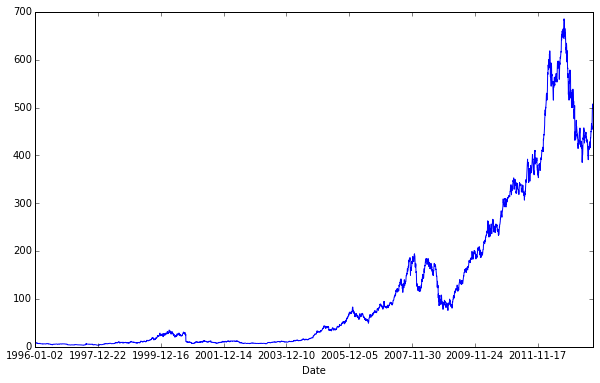

In [7]:
stock['Adj Close'].plot();

## Object creation

See the [Data Structure Intro](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro) section for more details.

Creating a Series by passing a list of values, letting pandas create a default integer index

In [8]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns.

In [9]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [10]:
rng = np.random.RandomState()

df = pd.DataFrame(rng.normal(size=(6, 4)), index=dates, columns=('rainfall', 'temp', 'humidity', 'windchill'))
df

rainfall      temp  humidity  windchill
2013-01-01 -0.662467 -0.191901 -0.175667  -0.558690
2013-01-02  1.270541  1.054413  0.038414   0.776049
2013-01-03 -0.235393 -0.232987 -0.470385   0.754916
2013-01-04  1.198919 -0.931672  1.246943   2.509463
2013-01-05  0.811507 -0.116251  0.733481   0.744871
2013-01-06  1.403215  0.900692  0.724887   0.293750

## Viewing Data

In [11]:
df.head()

rainfall      temp  humidity  windchill
2013-01-01 -0.662467 -0.191901 -0.175667  -0.558690
2013-01-02  1.270541  1.054413  0.038414   0.776049
2013-01-03 -0.235393 -0.232987 -0.470385   0.754916
2013-01-04  1.198919 -0.931672  1.246943   2.509463
2013-01-05  0.811507 -0.116251  0.733481   0.744871

In [12]:
df.tail(3)

rainfall      temp  humidity  windchill
2013-01-04  1.198919 -0.931672  1.246943   2.509463
2013-01-05  0.811507 -0.116251  0.733481   0.744871
2013-01-06  1.403215  0.900692  0.724887   0.293750

Display the index,columns, and the underlying numpy data

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [14]:
df.columns

Index(['rainfall', 'temp', 'humidity', 'windchill'], dtype='object')

In [15]:
df.values

array([[-0.66246667, -0.19190097, -0.17566691, -0.55868996],
       [ 1.27054095,  1.05441291,  0.03841357,  0.77604945],
       [-0.23539274, -0.2329866 , -0.47038455,  0.75491627],
       [ 1.198919  , -0.93167212,  1.24694288,  2.50946296],
       [ 0.81150682, -0.11625058,  0.73348094,  0.74487117],
       [ 1.403215  ,  0.90069156,  0.72488704,  0.29374982]])

Describe shows a quick statistic summary of your data

In [16]:
df.describe()

rainfall      temp  humidity  windchill
count  6.000000  6.000000  6.000000   6.000000
mean   0.631054  0.080382  0.349612   0.753393
std    0.869958  0.755897  0.653995   1.001719
min   -0.662467 -0.931672 -0.470385  -0.558690
25%    0.026332 -0.222715 -0.122147   0.406530
50%    1.005213 -0.154076  0.381650   0.749894
75%    1.252635  0.646456  0.731332   0.770766
max    1.403215  1.054413  1.246943   2.509463

Transposing your data

In [17]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  \
rainfall    -0.662467    1.270541   -0.235393    1.198919    0.811507   
temp        -0.191901    1.054413   -0.232987   -0.931672   -0.116251   
humidity    -0.175667    0.038414   -0.470385    1.246943    0.733481   
windchill   -0.558690    0.776049    0.754916    2.509463    0.744871   

           2013-01-06  
rainfall     1.403215  
temp         0.900692  
humidity     0.724887  
windchill    0.293750

Sorting by an axis

In [18]:
df.sort_index(ascending=False)

rainfall      temp  humidity  windchill
2013-01-06  1.403215  0.900692  0.724887   0.293750
2013-01-05  0.811507 -0.116251  0.733481   0.744871
2013-01-04  1.198919 -0.931672  1.246943   2.509463
2013-01-03 -0.235393 -0.232987 -0.470385   0.754916
2013-01-02  1.270541  1.054413  0.038414   0.776049
2013-01-01 -0.662467 -0.191901 -0.175667  -0.558690

Sorting by values

In [19]:
df.sort(columns='temp')

rainfall      temp  humidity  windchill
2013-01-04  1.198919 -0.931672  1.246943   2.509463
2013-01-03 -0.235393 -0.232987 -0.470385   0.754916
2013-01-01 -0.662467 -0.191901 -0.175667  -0.558690
2013-01-05  0.811507 -0.116251  0.733481   0.744871
2013-01-06  1.403215  0.900692  0.724887   0.293750
2013-01-02  1.270541  1.054413  0.038414   0.776049

## Selection

**Note** While many of the NumPy access methods work on DataFrames, use the pandas-specific data access methods, `.at`, `.iat`, `.loc`, `.iloc` and `.ix`.

See the [Indexing section](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and below.

### Getting

Selecting a single column, which yields a `Series`, equivalent to `df.A`

In [20]:
df['rainfall']

2013-01-01   -0.662467
2013-01-02    1.270541
2013-01-03   -0.235393
2013-01-04    1.198919
2013-01-05    0.811507
2013-01-06    1.403215
Freq: D, Name: rainfall, dtype: float64

Selecting via `[]`, which slices the rows.

In [21]:
df[:3]

rainfall      temp  humidity  windchill
2013-01-01 -0.662467 -0.191901 -0.175667  -0.558690
2013-01-02  1.270541  1.054413  0.038414   0.776049
2013-01-03 -0.235393 -0.232987 -0.470385   0.754916

### Selection by Label

In [22]:
df.loc['20130101':'20130103']

rainfall      temp  humidity  windchill
2013-01-01 -0.662467 -0.191901 -0.175667  -0.558690
2013-01-02  1.270541  1.054413  0.038414   0.776049
2013-01-03 -0.235393 -0.232987 -0.470385   0.754916

See more in [Selection by Label](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-label).

For getting a cross section using a label

In [23]:
df.loc[dates[0]]

rainfall    -0.662467
temp        -0.191901
humidity    -0.175667
windchill   -0.558690
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [24]:
df.loc[:, ['rainfall', 'temp']]

rainfall      temp
2013-01-01 -0.662467 -0.191901
2013-01-02  1.270541  1.054413
2013-01-03 -0.235393 -0.232987
2013-01-04  1.198919 -0.931672
2013-01-05  0.811507 -0.116251
2013-01-06  1.403215  0.900692

### Selection by Position

Select via the position of the passed integers—esentially equivalent to NumPy indexing.

In [ ]:
df.iloc[3]

By integer slices, acting similar to numpy/python

In [ ]:
df.iloc[3:5, 0:2]

By lists of integer position locations, similar to the numpy/python style

In [ ]:
df.iloc[[1,2,4], [0,2]]

For slicing rows or columns explicitly

In [ ]:
df.iloc[1:3, :]

### Boolean Indexing

In [ ]:
df

In [ ]:
df[df.rainfall > 0]

What happens if I select on the whole table?

In [ ]:
df[df > 0]

## Basic operations

Simple statistics

In [ ]:
df.mean()

And the same along a different axis:

In [ ]:
df.mean(axis=1)

Applying a function to the data

In [ ]:
print(df)
df.apply(np.cumsum)

In [ ]:
df.apply(lambda column: column.max() - column.min())

SQL-style operations like merging data

In [ ]:
left = pd.DataFrame({'subject': ['history', 'literature'], 'papers': [10, 20]})
right = pd.DataFrame({'subject': ['history', 'literature', 'science'], 'books': [4, 5, 9]})

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left, right, on='subject', how='outer')

Above, `how` can be:

  * left: use only keys from left frame (SQL: left outer join)
  * right: use only keys from right frame (SQL: right outer join)
  * outer: use union of keys from both frames (SQL: full outer join)
  * inner: use intersection of keys from both frames (SQL: inner join)

Append rows to a dataframe:

In [ ]:
#df = pd.DataFrame(np.arange(4 * 3).reshape((4, 3)), columns=['A','B','C'])
df

In [ ]:
#s = df.iloc[2]
#s

In [ ]:
df.append(df.iloc[0], ignore_index=True)

In [ ]:
row = pd.DataFrame([[0, 1, 2, 3]], columns=df.columns, index=['2015-08-19'])
df.append(row)

## Grouping

By “group by” we are referring to a process involving one or more of the following steps

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure

See the [Grouping docs](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby) for more.

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
                   'C' : range(8),
                   'D' : range(10, 18)})
df

Grouping and then applying a function sum to the resulting groups.

In [ ]:
df.groupby('A').sum()

Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [ ]:
df.groupby(['A', 'B']).sum()

In [ ]:
g = df.groupby('A')

In [ ]:
g.*?

```
g.A            g.B            g.C            g.D            g.agg          g.aggregate    
g.all          g.any          g.apply        g.bfill        g.boxplot      g.corr         
g.corrwith     g.count        g.cov          g.cumcount     g.cummax       g.cummin       
g.cumprod      g.cumsum       g.describe     g.diff         g.dtypes       g.ffill        
g.fillna       g.filter       g.first        g.get_group    g.groups       g.head         
g.hist         g.idxmax       g.idxmin       g.indices      g.irow         g.last         
g.mad          g.max          g.mean         g.median       g.min          g.name         
g.ngroups      g.nth          g.ohlc         g.pct_change   g.plot         g.prod         
g.quantile     g.rank         g.resample     g.sem          g.shift        g.size         
g.skew         g.std          g.sum          g.tail         g.take         g.transform    
g.tshift       g.var          
```